## First try with CONLL2023 dataset

In [1]:
from nltk.corpus.reader import ConllCorpusReader
### Adapt the path to point to the CONLL2003 folder on your local machine
train = ConllCorpusReader('CONLL2003',
                          'train.txt', # this will load the file 'train.txt', for the exercise you also need to load 'test.xt' 
                          ['words', 'pos', 'ignore', 'chunk'])
training_features = []
training_gold_labels = []

for token, pos, ne_label in train.iob_words():
    a_dict = {
        'words': token,
       
        
    }
    training_features.append(a_dict)
    training_gold_labels.append(ne_label)
   

In [2]:
import csv

test_file_path = 'NER-test.tsv'

test_features = []
test_gold_labels = []

with open(test_file_path, newline='', encoding='utf-8') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    sentence_tokens = []
    sentence_labels = []
    current_sentence_id = None
    
    for row in reader:
        if len(row) == 4:  # Assuming exactly 4 columns in your TSV file
            sentence_id, _, token, ne_label = row
            if current_sentence_id is None:
                current_sentence_id = sentence_id
                
            if sentence_id != current_sentence_id:
                # Append each token separately with its corresponding label
                for token, label in zip(sentence_tokens, sentence_labels):
                    test_features.append({'word': token, 'ne_label': label})
                    test_gold_labels.append(label)
                sentence_tokens = []
                sentence_labels = []
                current_sentence_id = sentence_id

            # Transform labels
            if ne_label == 'B-PERSON':
                ne_label = 'B-PER'
            elif ne_label == 'I-PERSON':
                ne_label = 'I-PER'

            sentence_tokens.append(token)
            sentence_labels.append(ne_label)

    # Add the last sentence
    if sentence_tokens:
        for token, label in zip(sentence_tokens, sentence_labels):
            test_features.append({'word': token, 'ne_label': label})
            test_gold_labels.append(label)

# Print the transformed test features
print(test_features)


[{'word': 'token', 'ne_label': 'BIO NER tag'}, {'word': 'token', 'ne_label': 'O'}, {'word': 'would', 'ne_label': 'O'}, {'word': "n't", 'ne_label': 'O'}, {'word': 'be', 'ne_label': 'O'}, {'word': 'caught', 'ne_label': 'O'}, {'word': 'dead', 'ne_label': 'O'}, {'word': 'watching', 'ne_label': 'O'}, {'word': 'the', 'ne_label': 'O'}, {'word': 'NFL', 'ne_label': 'B-ORG'}, {'word': 'if', 'ne_label': 'O'}, {'word': 'it', 'ne_label': 'O'}, {'word': 'were', 'ne_label': 'O'}, {'word': "n't", 'ne_label': 'O'}, {'word': 'for', 'ne_label': 'O'}, {'word': 'Taylor', 'ne_label': 'B-PER'}, {'word': 'Swift', 'ne_label': 'I-PER'}, {'word': '.', 'ne_label': 'O'}, {'word': '.', 'ne_label': 'B-PER'}, {'word': "O'Donnell", 'ne_label': 'I-PER'}, {'word': 'stated', 'ne_label': 'O'}, {'word': 'that', 'ne_label': 'O'}, {'word': 'while', 'ne_label': 'O'}, {'word': 'filming', 'ne_label': 'O'}, {'word': 'for', 'ne_label': 'O'}, {'word': 'this', 'ne_label': 'O'}, {'word': 'movie', 'ne_label': 'O'}, {'word': ',', 'ne_

In [3]:
from collections import Counter 
num_train_instances = len(train.iob_words())
num_test_instances = len(test_features)

print("Number of instances in train:", num_train_instances)
print("Number of instances in test:", num_test_instances)

train_label_freq = Counter(training_gold_labels)
test_label_freq = Counter(test_gold_labels)

print("\nFrequency distribution of NERC labels in train data:")
print(train_label_freq)

print("\nFrequency distribution of NERC labels in test data:")
print(test_label_freq)



Number of instances in train: 203621
Number of instances in test: 194

Frequency distribution of NERC labels in train data:
Counter({'O': 169578, 'B-LOC': 7140, 'B-PER': 6600, 'B-ORG': 6321, 'I-PER': 4528, 'I-ORG': 3704, 'B-MISC': 3438, 'I-LOC': 1157, 'I-MISC': 1155})

Frequency distribution of NERC labels in test data:
Counter({'O': 160, 'I-WORK_OF_ART': 9, 'B-PER': 6, 'I-ORG': 6, 'B-WORK_OF_ART': 4, 'B-ORG': 3, 'I-PER': 3, 'BIO NER tag': 1, 'B-DATE': 1, 'I-DATE': 1})


In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Vectorize the training features
vec = DictVectorizer()
X_train = vec.fit_transform(training_features)

In [5]:
svm_clf = LinearSVC()

In [6]:
svm_clf.fit(X_train, training_gold_labels)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [7]:
X_test = vec.transform(test_features)

In [8]:
predicted_labels = svm_clf.predict(X_test)

# Evaluate the classifier's performance
report = classification_report(test_gold_labels, predicted_labels)

print(report)

               precision    recall  f1-score   support

       B-DATE       0.00      0.00      0.00         1
        B-ORG       0.00      0.00      0.00         3
        B-PER       0.00      0.00      0.00         6
B-WORK_OF_ART       0.00      0.00      0.00         4
  BIO NER tag       0.00      0.00      0.00         1
       I-DATE       0.00      0.00      0.00         1
        I-ORG       0.00      0.00      0.00         6
        I-PER       0.00      0.00      0.00         3
I-WORK_OF_ART       0.00      0.00      0.00         9
            O       0.82      1.00      0.90       160

     accuracy                           0.82       194
    macro avg       0.08      0.10      0.09       194
 weighted avg       0.68      0.82      0.75       194



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [9]:
print(predicted_labels)

['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']


In [10]:
print((test_gold_labels))


['BIO NER tag', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'I-WORK_OF_ART', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'I-DATE', 'O', 'O', 'O', 'O', 'O', 'O', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'I-WORK_OF_ART', 'I-WORK_OF_ART', 'I

In [11]:
print(test_features)

[{'word': 'token', 'ne_label': 'BIO NER tag'}, {'word': 'token', 'ne_label': 'O'}, {'word': 'would', 'ne_label': 'O'}, {'word': "n't", 'ne_label': 'O'}, {'word': 'be', 'ne_label': 'O'}, {'word': 'caught', 'ne_label': 'O'}, {'word': 'dead', 'ne_label': 'O'}, {'word': 'watching', 'ne_label': 'O'}, {'word': 'the', 'ne_label': 'O'}, {'word': 'NFL', 'ne_label': 'B-ORG'}, {'word': 'if', 'ne_label': 'O'}, {'word': 'it', 'ne_label': 'O'}, {'word': 'were', 'ne_label': 'O'}, {'word': "n't", 'ne_label': 'O'}, {'word': 'for', 'ne_label': 'O'}, {'word': 'Taylor', 'ne_label': 'B-PER'}, {'word': 'Swift', 'ne_label': 'I-PER'}, {'word': '.', 'ne_label': 'O'}, {'word': '.', 'ne_label': 'B-PER'}, {'word': "O'Donnell", 'ne_label': 'I-PER'}, {'word': 'stated', 'ne_label': 'O'}, {'word': 'that', 'ne_label': 'O'}, {'word': 'while', 'ne_label': 'O'}, {'word': 'filming', 'ne_label': 'O'}, {'word': 'for', 'ne_label': 'O'}, {'word': 'this', 'ne_label': 'O'}, {'word': 'movie', 'ne_label': 'O'}, {'word': ',', 'ne_

In [12]:
print(training_features[:21])

[{'words': 'EU'}, {'words': 'rejects'}, {'words': 'German'}, {'words': 'call'}, {'words': 'to'}, {'words': 'boycott'}, {'words': 'British'}, {'words': 'lamb'}, {'words': '.'}, {'words': 'Peter'}, {'words': 'Blackburn'}, {'words': 'BRUSSELS'}, {'words': '1996-08-22'}, {'words': 'The'}, {'words': 'European'}, {'words': 'Commission'}, {'words': 'said'}, {'words': 'on'}, {'words': 'Thursday'}, {'words': 'it'}, {'words': 'disagreed'}]


## Switch to Word Embedding method

In [13]:
import gensim
word_embedding_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [16]:
import numpy as np
# Define input vectors and labels
input_vectors = []
labels = []

# Iterate over training data
for token, pos, ne_label in train.iob_words():
    if token != '' and token != 'DOCSTART':  # Skip empty tokens and DOCSTART markers
        if token in word_embedding_model:
            vector = word_embedding_model[token]  # Use the embedding vector if the token is found
        else:
            vector = np.zeros(300)  # Use a zero vector if the token is not found in the embeddings
        input_vectors.append(vector)
        labels.append(ne_label)

# Convert input vectors and labels to numpy arrays for model training
input_vectors = np.array(input_vectors)
labels = np.array(labels)

# Train a LinearSVC model using the prepared word embeddings
lin_clf_embeddings = LinearSVC()
lin_clf_embeddings.fit(input_vectors, labels)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [17]:
import numpy as np
input_vectors = []
labels = []

# Iterate over training data
for token, pos, ne_label in train.iob_words():
    if token != '' and token != 'DOCSTART':
        # Transform labels
        if ne_label == 'B-PERSON':
            ne_label = 'B-PER'
        elif ne_label == 'I-PERSON':
            ne_label = 'I-PER'

        # Get word embeddings
        if token in word_embedding_model:
            vector = word_embedding_model[token]
        else:
            vector = np.zeros(300)  # Use zero vector if token not found in embeddings
        input_vectors.append(vector)
        labels.append(ne_label)

# Train a model (e.g., SVM) using word embeddings
lin_clf_embeddings = LinearSVC()
lin_clf_embeddings.fit(input_vectors, labels)

# Convert input vectors and labels to numpy arrays
input_vectors = np.array(input_vectors)
labels = np.array(labels)

# Read the test data
test_file_path = 'NER-test.tsv'

test_features = []
test_gold_labels = []

with open(test_file_path, newline='', encoding='utf-8') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    sentence_tokens = []
    sentence_labels = []
    current_sentence_id = None

    for row in reader:
        if len(row) == 4:  # Assuming exactly 4 columns in your TSV file
            sentence_id, _, token, ne_label = row
            if current_sentence_id is None:
                current_sentence_id = sentence_id

            if sentence_id != current_sentence_id:
                # Append each token separately with its corresponding label
                for token, label in zip(sentence_tokens, sentence_labels):
                    test_features.append({'word': token, 'ne_label': label})
                    test_gold_labels.append(label)
                sentence_tokens = []
                sentence_labels = []
                current_sentence_id = sentence_id

            # Transform labels
            if ne_label == 'B-PERSON':
                ne_label = 'B-PER'
            elif ne_label == 'I-PERSON':
                ne_label = 'I-PER'

            sentence_tokens.append(token)
            sentence_labels.append(ne_label)

    # Add the last sentence
    if sentence_tokens:
        for token, label in zip(sentence_tokens, sentence_labels):
            test_features.append({'word': token, 'ne_label': label})
            test_gold_labels.append(label)

# Convert test input vectors and labels to numpy arrays
test_input_vectors = np.array([word_embedding_model[token] if token in word_embedding_model else np.zeros(300) for token in [instance['word'] for instance in test_features]])
test_labels = np.array([instance['ne_label'] for instance in test_features])

# Predict labels for the test data
predicted_labels_embeddings = lin_clf_embeddings.predict(test_input_vectors)

# Generate classification report
report_embeddings = classification_report(test_labels, predicted_labels_embeddings)

# Print the classification report
print(report_embeddings)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       B-DATE       0.00      0.00      0.00         1
       B-MISC       0.00      0.00      0.00         0
        B-ORG       0.50      0.67      0.57         3
        B-PER       0.60      0.50      0.55         6
B-WORK_OF_ART       0.00      0.00      0.00         4
  BIO NER tag       0.00      0.00      0.00         1
       I-DATE       0.00      0.00      0.00         1
        I-LOC       0.00      0.00      0.00         0
        I-ORG       0.00      0.00      0.00         6
        I-PER       0.50      0.33      0.40         3
I-WORK_OF_ART       0.00      0.00      0.00         9
            O       0.90      1.00      0.95       160

     accuracy                           0.86       194
    macro avg       0.21      0.21      0.21       194
 weighted avg       0.78      0.86      0.81       194



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto

AttributeError: 'Line2D' object has no property 'labels'

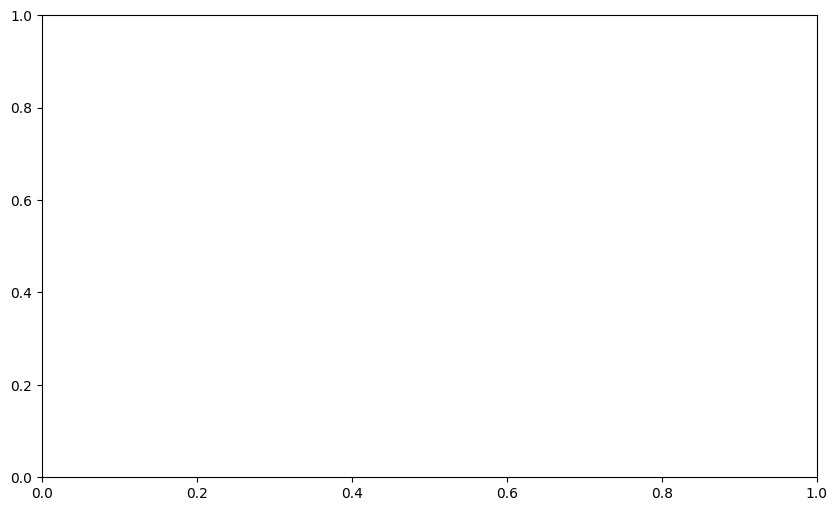

In [21]:
#Use learning_curve to evaluate the model
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lin_clf_embeddings, X=input_vectors, y=labels, cv=5,
    scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



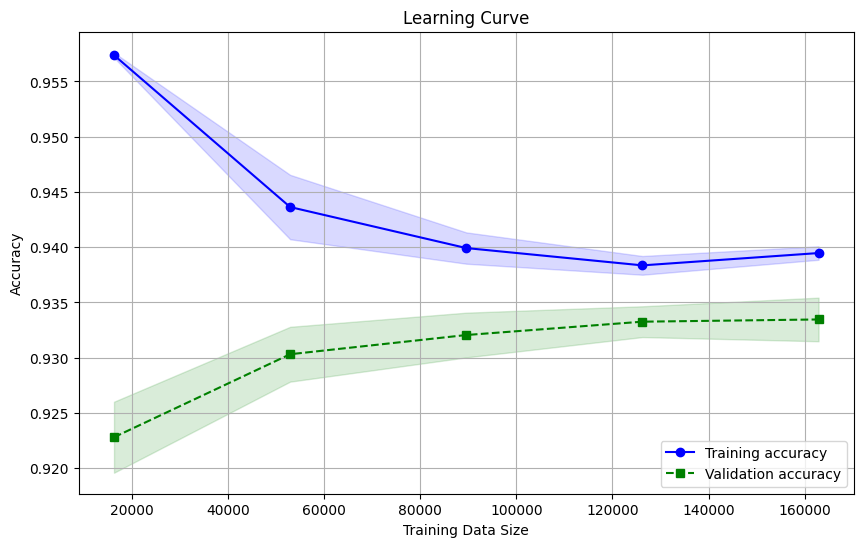

In [22]:
plt.figure(figsize=(10, 6)) # Making the plot bigger
plt.plot(train_sizes, train_mean, color="blue", marker="o", label="Training accuracy")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, color="blue", alpha=0.15)

plt.plot(train_sizes, test_mean, color="green", marker="s", linestyle="--", label="Validation accuracy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color="green", alpha=0.15)

plt.title("Learning Curve")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns 

cm = confusion_matrix(test_labels, predicted_labels_embeddings)
precision, recall, fscore, support = precision_recall_fscore_support(test_labels, predicted_labels_embeddings)
accuracy = accuracy_score(test_labels, predicted_labels_embeddings)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


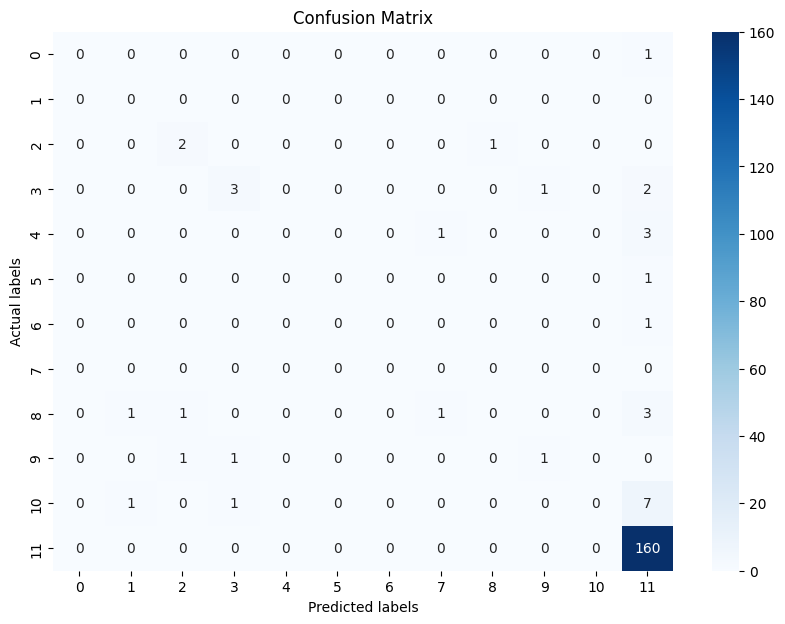

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()


In [27]:
# Update n_groups based on the actual metrics returned
n_groups = len(precision)  # This should now match the length of precision, recall, and fscore arrays


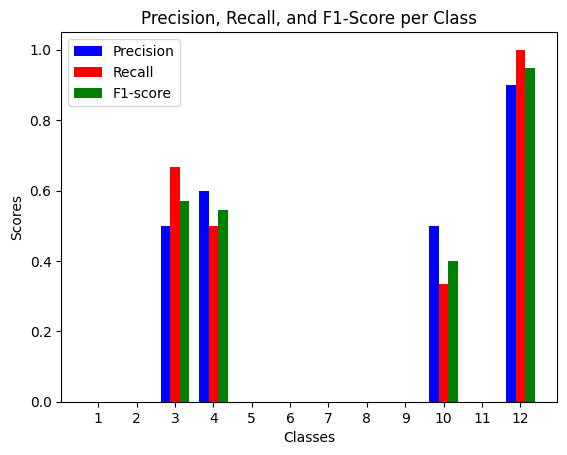

In [28]:

n_groups = len(precision)  # Adjusted to match the length of precision, recall, fscore arrays

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25

bar1 = ax.bar(index, precision, bar_width, label='Precision', color='b')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='r')
bar3 = ax.bar(index + 2*bar_width, fscore, bar_width, label='F1-score', color='g')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(range(1, n_groups + 1))  # Assuming your class labels start from 1
ax.legend()

plt.show()


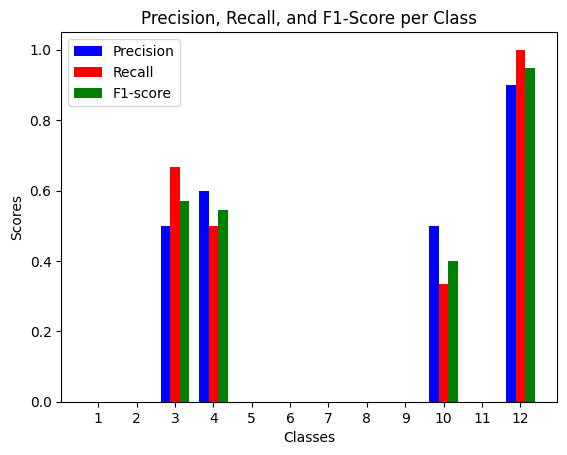

In [29]:

n_groups = len(precision)  # Adjusted to match the length of precision, recall, fscore arrays

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25

bar1 = ax.bar(index, precision, bar_width, label='Precision', color='b')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='r')
bar3 = ax.bar(index + 2*bar_width, fscore, bar_width, label='F1-score', color='g')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(range(1, n_groups + 1))  # Assuming your class labels start from 1
ax.legend()

plt.show()
